# Poker data analysis

## Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "poker_results_long.csv"

In [3]:
df = pd.read_csv(filename)
df.head()

,Date,Position,Player
0,2021-11-23,1,Jacques
1,2021-11-23,2,Nick
2,2021-11-23,3,Kevin
3,2021-11-23,4,Marlan
4,2021-11-23,5,David


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      420 non-null    datetime64[ns]
 1   Position  420 non-null    int64         
 2   Player    420 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
df.head()

,Date,Position,Player
0,2021-11-23,1,Jacques
1,2021-11-23,2,Nick
2,2021-11-23,3,Kevin
3,2021-11-23,4,Marlan
4,2021-11-23,5,David


In [7]:
sns.set_theme()
sns.set_style("white")
sns.set_palette("bright")

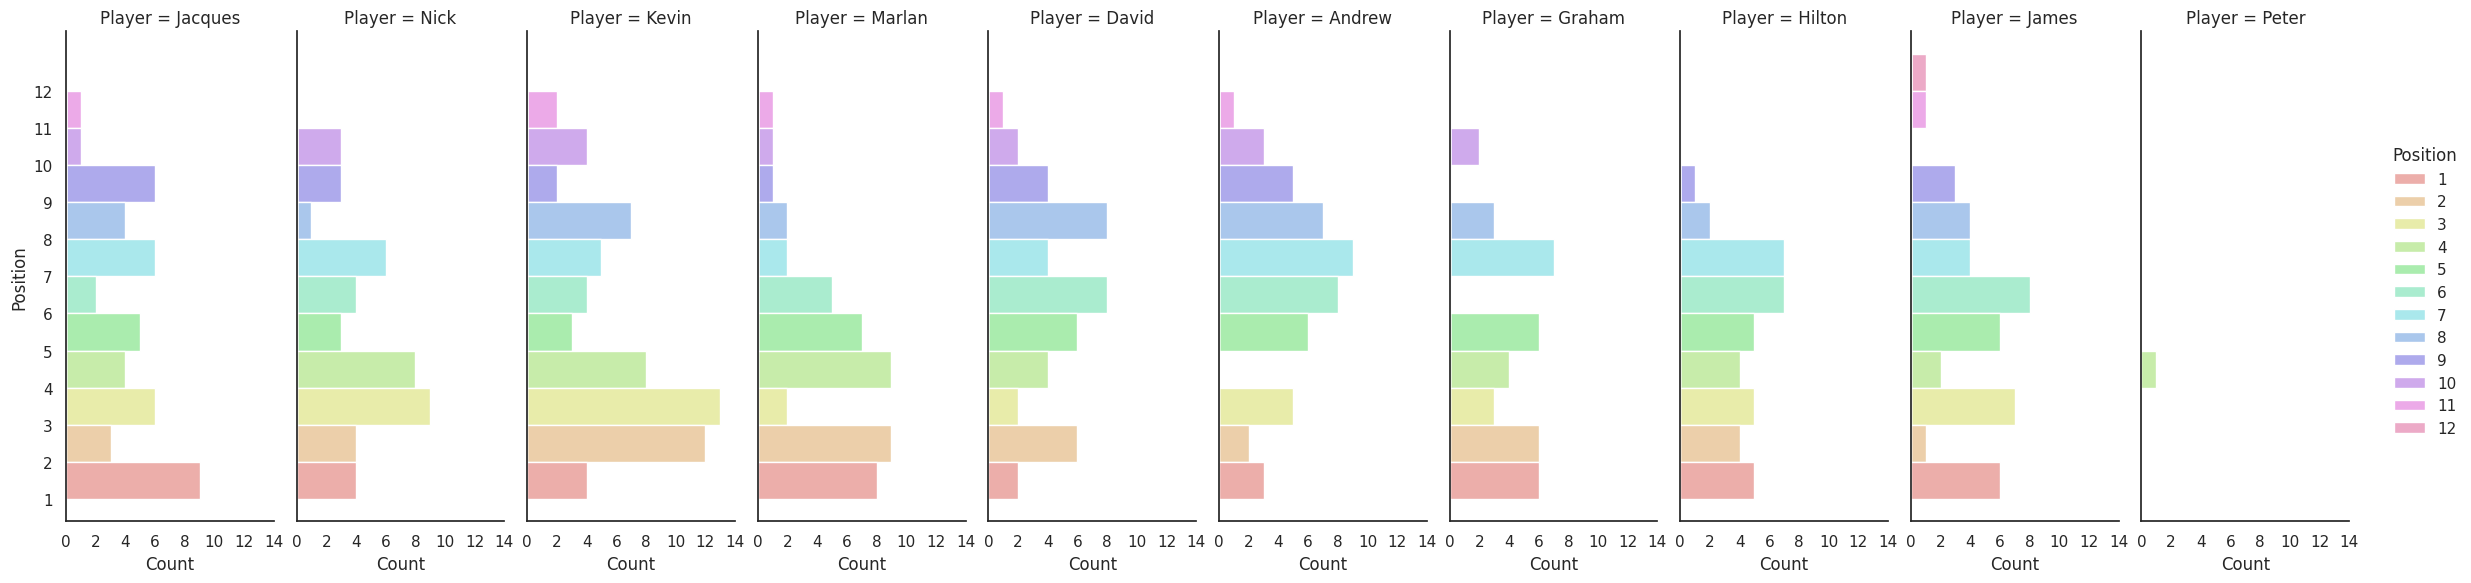

In [8]:
g = sns.displot(data=df, kind="hist", col="Player", y="Position", hue="Position", palette=sns.color_palette("hls", 12), height=6, aspect=0.4, binwidth=1, binrange=[1, 13])
for ax in g.axes.ravel():
    ax.set_yticks(list(range(1, 13)))
    ax.set_xticks(list(range(0, 16, 2)))

In [9]:
df.head()

,Date,Position,Player
0,2021-11-23,1,Jacques
1,2021-11-23,2,Nick
2,2021-11-23,3,Kevin
3,2021-11-23,4,Marlan
4,2021-11-23,5,David


## Add in additional info columns
- No ghost position (take the first elimination only)
- Final order (ignore all previous eliminations - take the last eliminated position only)
- Mark ghost plays (flag positions occupied as a ghost)
- Game table
- Scoring table

In [10]:
df["EliminationRank"] = df.groupby(["Date", "Player"])["Position"].rank(ascending=False).astype("int64")
df["ReverseEliminationRank"] = df.groupby(["Date", "Player"])["Position"].rank().astype("int64")

In [11]:
df.loc[df["EliminationRank"] == 1, "NoGhostFlag"] = True
df.loc[df["ReverseEliminationRank"] == 1, "FinalPositionFlag"] = True

In [12]:
df.loc[df["NoGhostFlag"].isna(), "NoGhostFlag"] = False
df.loc[df["FinalPositionFlag"].isna(), "FinalPositionFlag"] = False

In [13]:
df["NoGhostFlag"] = df["NoGhostFlag"].astype(bool)
df["FinalPositionFlag"] = df["FinalPositionFlag"].astype(bool)

In [14]:
df[~df["NoGhostFlag"]]

,Date,Position,Player,EliminationRank,ReverseEliminationRank,NoGhostFlag,FinalPositionFlag
6,2021-11-23,7,Graham,2,1,False,True
13,2021-11-30,4,Nick,2,1,False,True
23,2021-12-07,7,Nick,2,1,False,True
25,2021-12-07,9,James,2,1,False,True
48,2022-01-18,6,Andrew,2,1,False,True
...,...,...,...,...,...,...,...
358,2022-10-18,6,James,2,1,False,True
367,2022-10-25,3,Nick,2,1,False,True
369,2022-10-25,5,Kevin,2,1,False,True
389,2022-11-08,6,Andrew,2,1,False,True


In [15]:
df[~df["FinalPositionFlag"]]

,Date,Position,Player,EliminationRank,ReverseEliminationRank,NoGhostFlag,FinalPositionFlag
9,2021-11-23,10,Graham,1,2,True,False
16,2021-11-30,7,Nick,1,2,True,False
26,2021-12-07,10,Nick,1,2,True,False
27,2021-12-07,11,James,1,2,True,False
50,2022-01-18,8,David,1,2,True,False
...,...,...,...,...,...,...,...
364,2022-10-18,12,James,1,2,True,False
371,2022-10-25,7,Nick,1,2,True,False
373,2022-10-25,8,Kevin,1,2,True,False
392,2022-11-08,9,Andrew,1,2,True,False


In [16]:
df.loc[df["NoGhostFlag"], "NoGhostPosition"] = df[df["NoGhostFlag"]].groupby("Date")["Position"].rank(method="min")
df.loc[df["FinalPositionFlag"], "FinalPosition"] = df[df["FinalPositionFlag"]].groupby("Date")["Position"].rank(method="min")

In [17]:
df.loc[df["NoGhostFlag"]]

,Date,Position,Player,EliminationRank,ReverseEliminationRank,NoGhostFlag,FinalPositionFlag,NoGhostPosition,FinalPosition
0,2021-11-23,1,Jacques,1,1,True,True,1.0,1.0
1,2021-11-23,2,Nick,1,1,True,True,2.0,2.0
2,2021-11-23,3,Kevin,1,1,True,True,3.0,3.0
3,2021-11-23,4,Marlan,1,1,True,True,4.0,4.0
4,2021-11-23,5,David,1,1,True,True,5.0,5.0
...,...,...,...,...,...,...,...,...,...
415,2022-12-06,5,Nick,1,1,True,True,5.0,5.0
416,2022-12-06,6,Marlan,1,1,True,True,6.0,6.0
417,2022-12-06,7,James,1,1,True,True,7.0,7.0
418,2022-12-06,8,David,1,1,True,True,8.0,8.0


In [18]:
df.loc[df["FinalPositionFlag"]]

,Date,Position,Player,EliminationRank,ReverseEliminationRank,NoGhostFlag,FinalPositionFlag,NoGhostPosition,FinalPosition
0,2021-11-23,1,Jacques,1,1,True,True,1.0,1.0
1,2021-11-23,2,Nick,1,1,True,True,2.0,2.0
2,2021-11-23,3,Kevin,1,1,True,True,3.0,3.0
3,2021-11-23,4,Marlan,1,1,True,True,4.0,4.0
4,2021-11-23,5,David,1,1,True,True,5.0,5.0
...,...,...,...,...,...,...,...,...,...
415,2022-12-06,5,Nick,1,1,True,True,5.0,5.0
416,2022-12-06,6,Marlan,1,1,True,True,6.0,6.0
417,2022-12-06,7,James,1,1,True,True,7.0,7.0
418,2022-12-06,8,David,1,1,True,True,8.0,8.0


In [19]:
df.loc[~df["NoGhostFlag"], :].groupby(["Player"])["Date"].count()

Player
Andrew     10
David       6
Graham      4
Hilton      2
Jacques     6
James       6
Kevin      17
Marlan      6
Nick       10
Name: Date, dtype: int64

In [20]:
df[df["NoGhostFlag"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 419
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    353 non-null    datetime64[ns]
 1   Position                353 non-null    int64         
 2   Player                  353 non-null    object        
 3   EliminationRank         353 non-null    int64         
 4   ReverseEliminationRank  353 non-null    int64         
 5   NoGhostFlag             353 non-null    bool          
 6   FinalPositionFlag       353 non-null    bool          
 7   NoGhostPosition         353 non-null    float64       
 8   FinalPosition           295 non-null    float64       
dtypes: bool(2), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 22.8+ KB


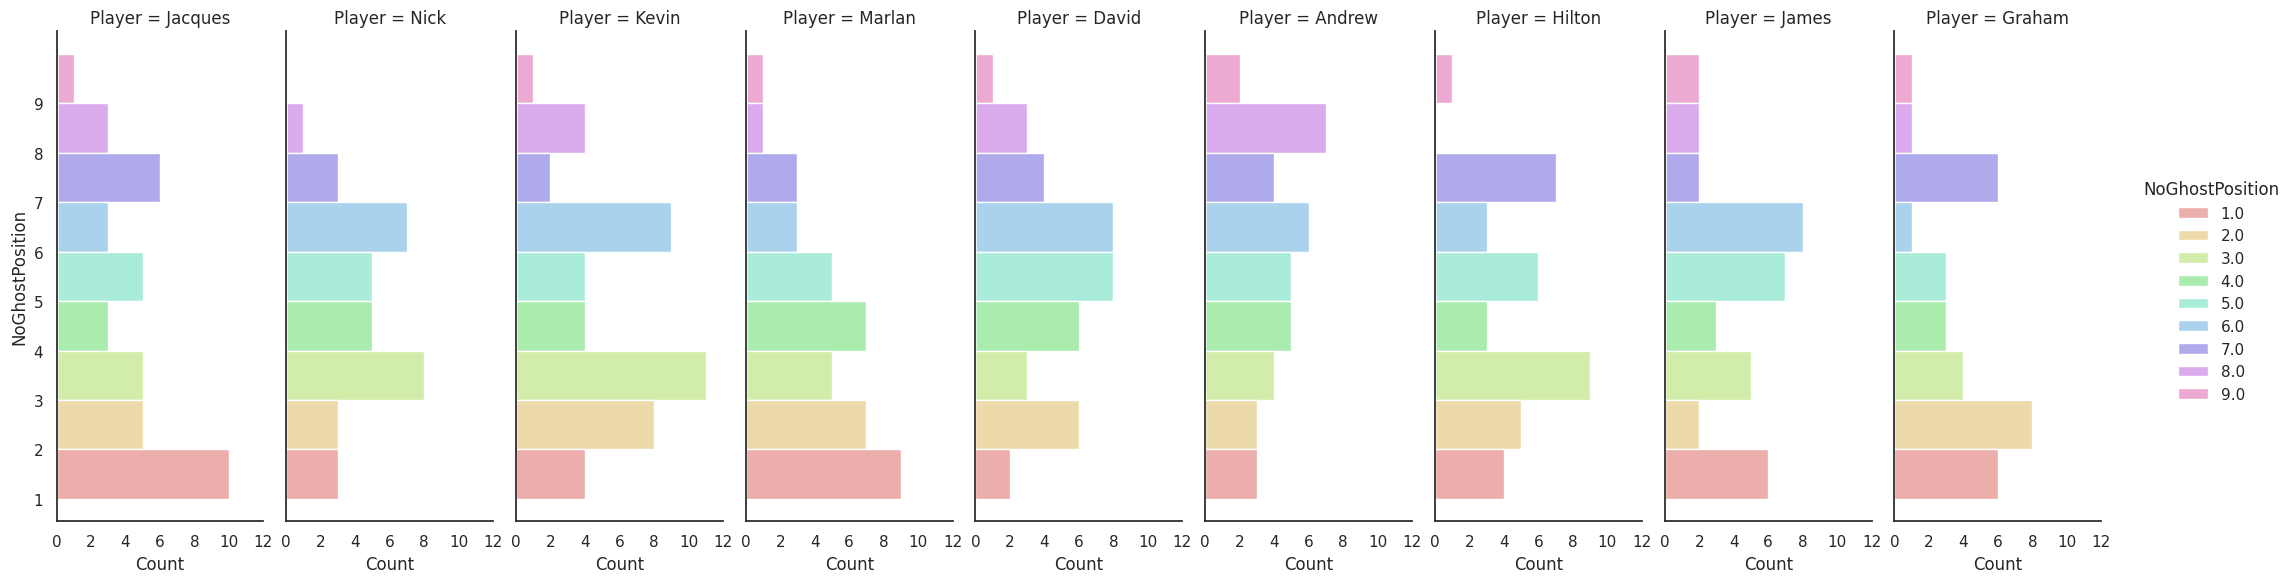

In [148]:
g = sns.displot(data=df[df["Player"]!="Peter"].loc[df["NoGhostFlag"], :], kind="hist", col="Player", y="NoGhostPosition", hue="NoGhostPosition", palette=sns.color_palette("hls", 9), height=6, aspect=0.4, binwidth=1, binrange=[1, 10])
for ax in g.axes.ravel():
    ax.set_yticks(list(range(1, 10)))
    ax.set_xticks(list(range(0, 14, 2)))

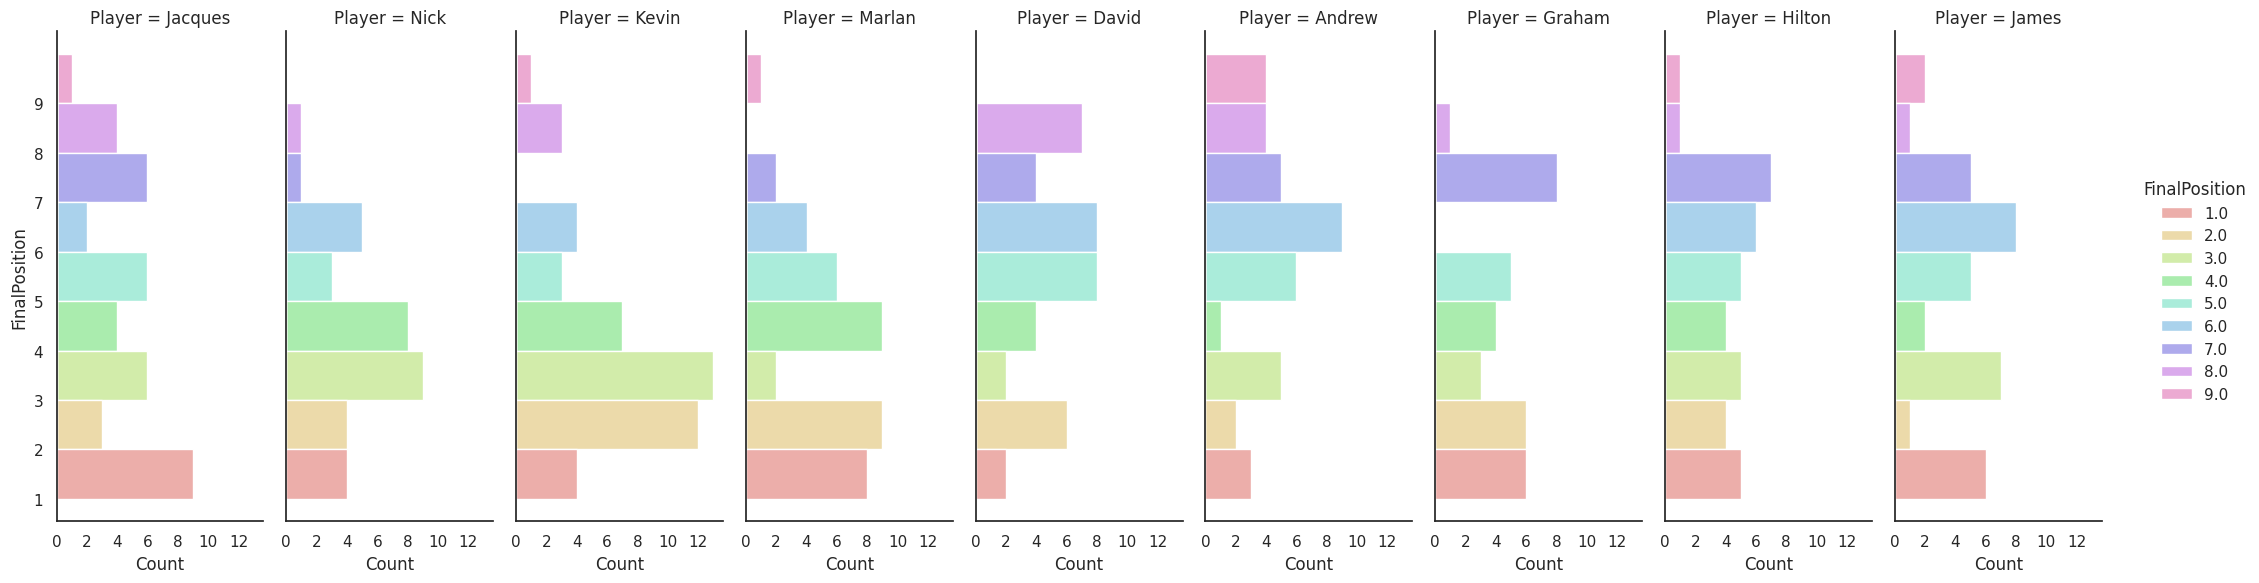

In [149]:
g = sns.displot(data=df[df["Player"]!="Peter"].loc[df["FinalPositionFlag"], :], kind="hist", col="Player", y="FinalPosition", hue="FinalPosition", palette=sns.color_palette("hls", 9), height=6, aspect=0.4, binwidth=1, binrange=[1, 10])
for ax in g.axes.ravel():
    ax.set_yticks(list(range(1, 10)))
    ax.set_xticks(list(range(0, 14, 2)))

In [23]:
df[(~df["NoGhostFlag"]) & (df["Position"] == 1)]

,Date,Position,Player,EliminationRank,ReverseEliminationRank,NoGhostFlag,FinalPositionFlag,NoGhostPosition,FinalPosition
245,2022-07-19,1,Hilton,2,1,False,True,NaN,1.0
282,2022-08-16,1,Nick,2,1,False,True,NaN,1.0


In [24]:
scoring_filename = "scoring.csv"

In [25]:
scoring_df = pd.read_csv(scoring_filename)
scoring_df

,Position,F1score,F12009score,F12002score,WFP
0,1,25,10.0,10.0,300
1,2,18,8.0,6.0,200
2,3,15,6.0,4.0,150
3,4,12,5.0,3.0,110
4,5,10,4.0,2.0,80
5,6,8,3.0,1.0,60
6,7,6,2.0,1.0,40
7,8,4,1.0,1.0,30
8,9,2,NaN,NaN,20
9,10,1,NaN,NaN,10


In [26]:
df.merge(scoring_df, how="inner", left_on="FinalPosition", right_on="Position").groupby("Player")["F1score"].sum().sort_values(ascending=False)

Player
Kevin      671
Marlan     606
Jacques    547
Nick       483
Hilton     466
Graham     453
James      449
David      432
Andrew     384
Peter       12
Name: F1score, dtype: int64

In [27]:
df.merge(scoring_df, how="inner", left_on="NoGhostPosition", right_on="Position").groupby("Player")["F1score"].sum().sort_values(ascending=False)

Player
Marlan     608
Kevin      599
Jacques    575
Hilton     489
Graham     470
David      457
James      455
Nick       437
Andrew     403
Peter       12
Name: F1score, dtype: int64

In [28]:
(df.merge(scoring_df, how="inner", left_on="FinalPosition", right_on="Position").groupby("Player")["F1score"].sum() - df.merge(scoring_df, how="inner", left_on="NoGhostPosition", right_on="Position").groupby("Player")["F1score"].sum()).sort_values(ascending=False)

Player
Kevin      72
Nick       46
Peter       0
Marlan     -2
James      -6
Graham    -17
Andrew    -19
Hilton    -23
David     -25
Jacques   -28
Name: F1score, dtype: int64

In [29]:
df[~df["FinalPosition"].isna()].groupby("Player")["Date"].count()

Player
Andrew     39
David      41
Graham     33
Hilton     38
Jacques    41
James      37
Kevin      47
Marlan     41
Nick       35
Peter       1
Name: Date, dtype: int64

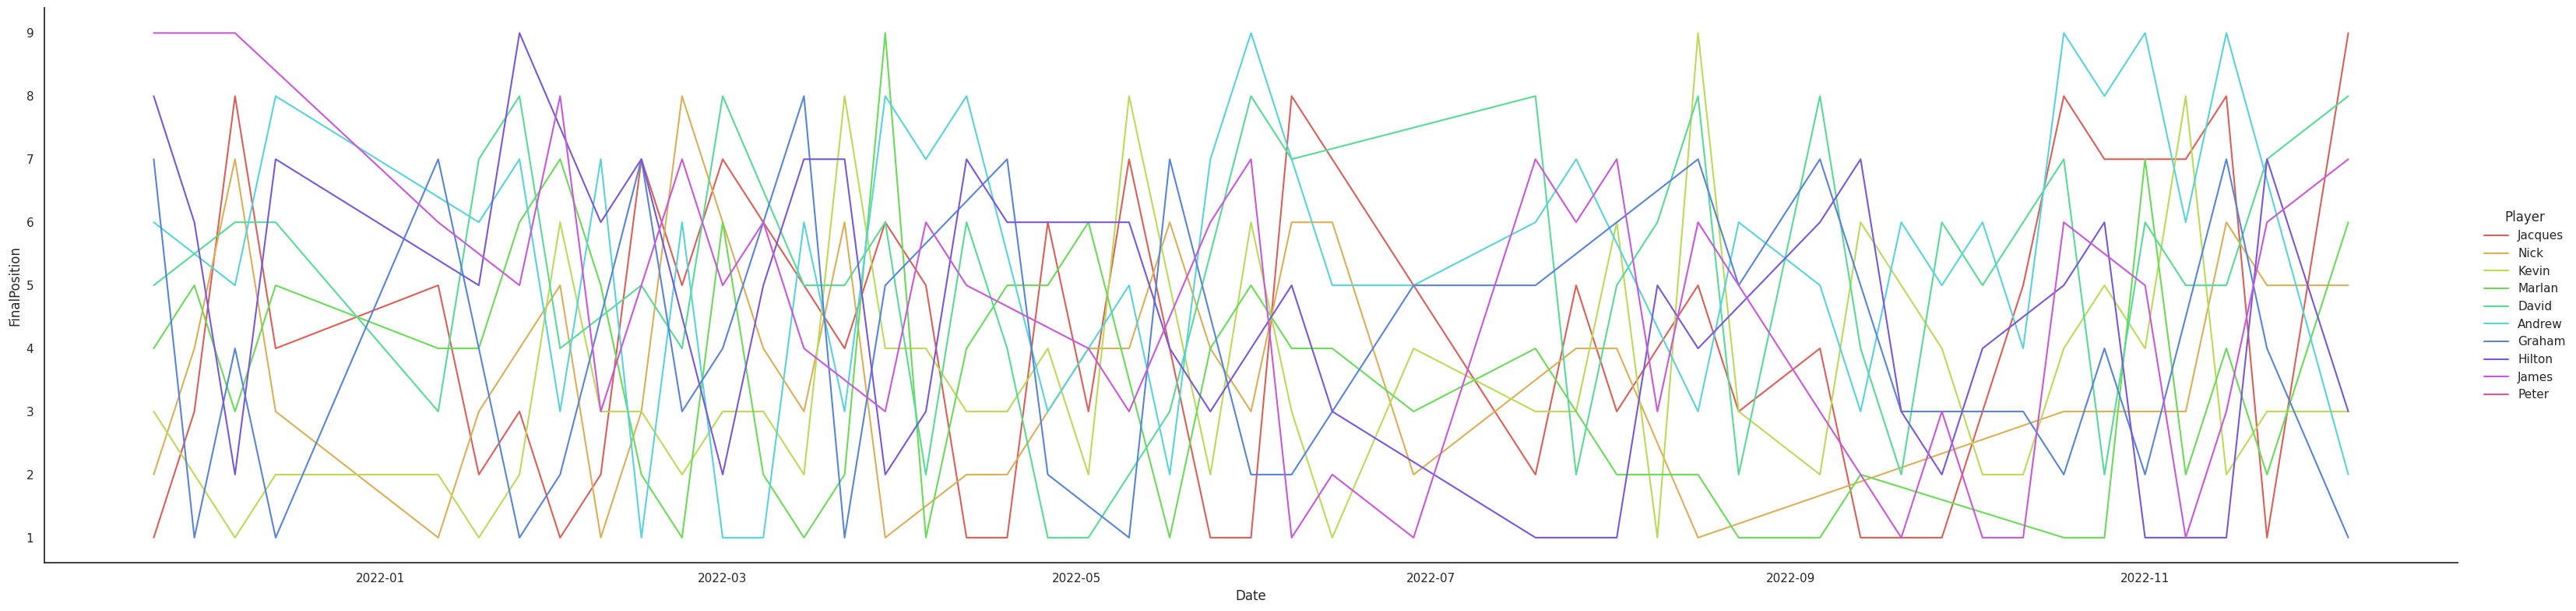

In [30]:
sns.relplot(df[df["FinalPositionFlag"]], kind="line", x="Date", y="FinalPosition", hue="Player", palette="hls", height=8, aspect=4)

In [95]:
no_ghost_results_df = pd.pivot_table(df, index="Date", columns="Player", values="NoGhostPosition")
final_results_df = pd.pivot_table(df, index="Date", columns="Player", values="FinalPosition")

no_ghost_results_df.to_csv("no_ghost_results.csv")
final_results_df.to_csv("final_results.csv")

In [96]:
no_ghost_results_df

Player,Andrew,David,Graham,Hilton,Jacques,James,Kevin,Marlan,Nick,Peter
Date,,,,,,,,,,
2021-11-23,6.0,5.0,9.0,7.0,1.0,8.0,3.0,4.0,2.0,NaN
2021-11-30,NaN,NaN,1.0,5.0,3.0,NaN,2.0,4.0,6.0,NaN
2021-12-07,5.0,6.0,4.0,2.0,7.0,9.0,1.0,3.0,8.0,NaN
2021-12-14,8.0,6.0,1.0,7.0,4.0,NaN,2.0,5.0,3.0,NaN
2022-01-11,NaN,3.0,7.0,NaN,5.0,6.0,2.0,4.0,1.0,NaN
2022-01-18,7.0,6.0,NaN,5.0,2.0,NaN,1.0,4.0,3.0,NaN
2022-01-25,7.0,8.0,1.0,9.0,3.0,5.0,2.0,6.0,4.0,NaN
2022-02-01,3.0,4.0,2.0,NaN,1.0,8.0,6.0,7.0,5.0,NaN
2022-02-08,6.0,NaN,NaN,5.0,2.0,3.0,3.0,7.0,1.0,NaN


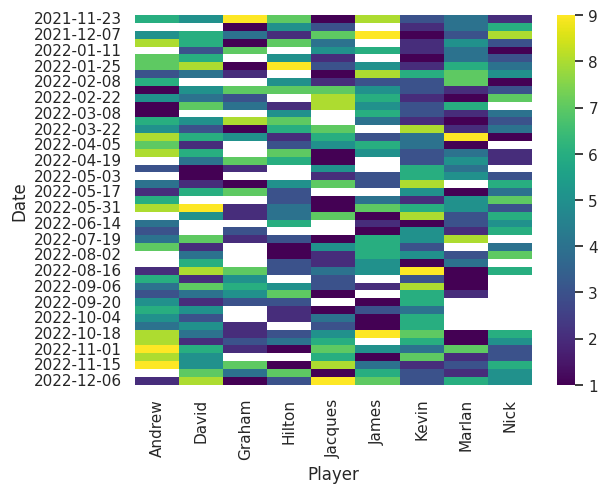

In [99]:
g = sns.heatmap(no_ghost_results_df.reset_index().drop(columns="Peter").assign(Date=no_ghost_results_df.reset_index()["Date"].apply(lambda x: x.strftime("%Y-%m-%d"))).set_index("Date"), cmap="viridis")

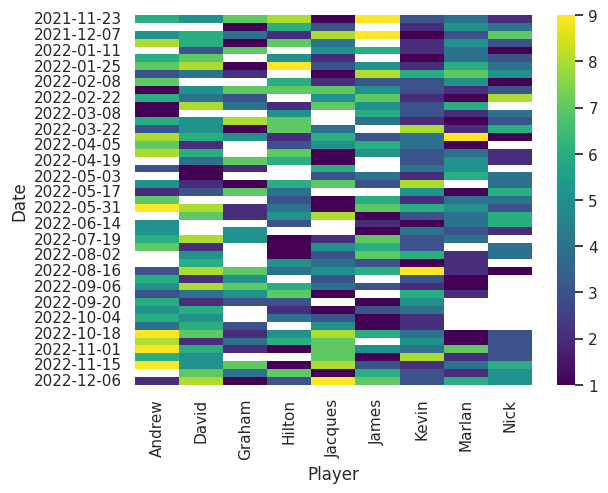

In [100]:
g = sns.heatmap(final_results_df.reset_index().drop(columns="Peter").assign(Date=final_results_df.reset_index()["Date"].apply(lambda x: x.strftime("%Y-%m-%d"))).set_index("Date"), cmap="viridis")

In [50]:
no_ghost_results_df.corr()

Player,Andrew,David,Graham,Hilton,Jacques,James,Kevin,Marlan,Nick,Peter
Player,,,,,,,,,,
Andrew,1.000000,-0.063666,-0.131909,-0.102464,-0.101120,0.018322,-0.172209,0.137395,-0.275333,NaN
David,-0.063666,1.000000,0.020010,0.137562,-0.099907,0.213645,-0.186075,0.301849,-0.029278,NaN
Graham,-0.131909,0.020010,1.000000,0.062753,-0.151234,0.040433,-0.219733,-0.334259,-0.380325,NaN
Hilton,-0.102464,0.137562,0.062753,1.000000,-0.345319,-0.014798,-0.130899,-0.166063,-0.394811,NaN
Jacques,-0.101120,-0.099907,-0.151234,-0.345319,1.000000,-0.043104,0.064225,-0.162421,0.272923,NaN
James,0.018322,0.213645,0.040433,-0.014798,-0.043104,1.000000,-0.319827,0.056230,0.135729,NaN
Kevin,-0.172209,-0.186075,-0.219733,-0.130899,0.064225,-0.319827,1.000000,-0.219007,0.136456,NaN
Marlan,0.137395,0.301849,-0.334259,-0.166063,-0.162421,0.056230,-0.219007,1.000000,-0.434530,NaN
Nick,-0.275333,-0.029278,-0.380325,-0.394811,0.272923,0.135729,0.136456,-0.434530,1.000000,NaN


<AxesSubplot: xlabel='Player', ylabel='Player'>

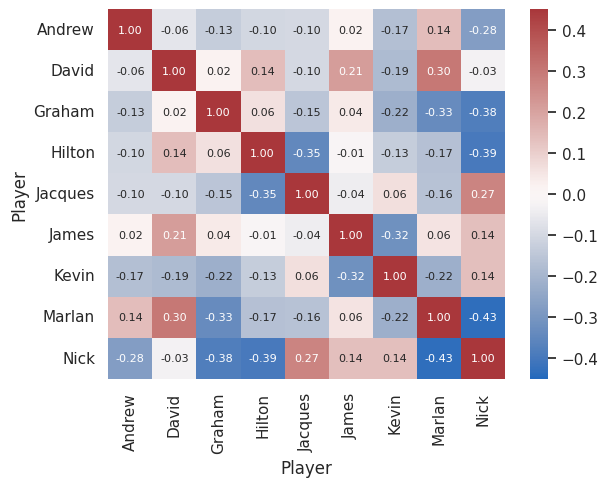

In [62]:
sns.heatmap(no_ghost_results_df.drop(columns="Peter").corr(), vmin=-0.45, vmax=0.45, center=0, cmap="vlag", annot=True, fmt=".2f", annot_kws={"fontsize": 8})

<AxesSubplot: xlabel='Player', ylabel='Player'>

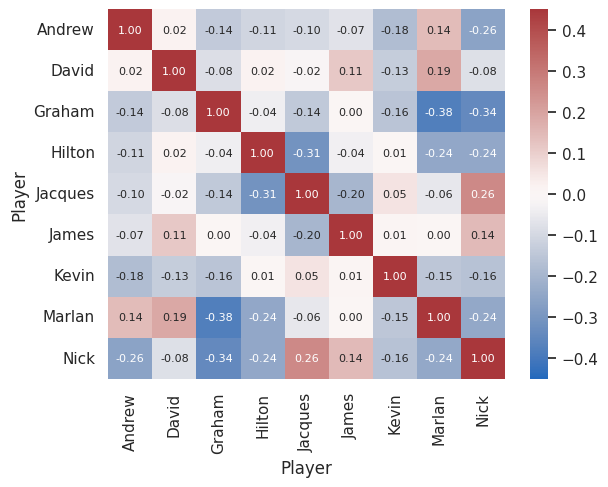

In [63]:
sns.heatmap(final_results_df.drop(columns="Peter").corr(), vmin=-0.45, vmax=0.45, center=0, cmap="vlag", annot=True, fmt=".2f", annot_kws={"fontsize": 8})

In [101]:
no_ghost_results_df - final_results_df

Player,Andrew,David,Graham,Hilton,Jacques,James,Kevin,Marlan,Nick,Peter
Date,,,,,,,,,,
2021-11-23,0.0,0.0,2.0,-1.0,0.0,-1.0,0.0,0.0,0.0,NaN
2021-11-30,NaN,NaN,0.0,-1.0,0.0,NaN,0.0,-1.0,2.0,NaN
2021-12-07,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,NaN
2021-12-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
2022-01-11,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2022-01-18,1.0,-1.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN
2022-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2022-02-01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2022-02-08,-1.0,NaN,NaN,-1.0,0.0,0.0,0.0,2.0,0.0,NaN


In [102]:
(no_ghost_results_df - final_results_df).sum()

Player
Andrew     -9.0
David     -12.0
Graham     -6.0
Hilton    -12.0
Jacques    -9.0
James      -3.0
Kevin      31.0
Marlan      2.0
Nick       18.0
Peter       0.0
dtype: float64

In [111]:
{row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}

{1.0: 25.0,
 2.0: 18.0,
 3.0: 15.0,
 4.0: 12.0,
 5.0: 10.0,
 6.0: 8.0,
 7.0: 6.0,
 8.0: 4.0,
 9.0: 2.0,
 10.0: 1.0}

In [120]:
no_ghost_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill()

Player,Andrew,David,Graham,Hilton,Jacques,James,Kevin,Marlan,Nick
Date,,,,,,,,,
2021-11-23,8.0,10.0,2.0,6.0,25.0,4.0,15.0,12.0,18.0
2021-11-30,8.0,10.0,27.0,16.0,40.0,4.0,33.0,24.0,26.0
2021-12-07,18.0,18.0,39.0,34.0,46.0,6.0,58.0,39.0,30.0
2021-12-14,22.0,26.0,64.0,40.0,58.0,6.0,76.0,49.0,45.0
2022-01-11,22.0,41.0,70.0,40.0,68.0,14.0,94.0,61.0,70.0
2022-01-18,28.0,49.0,70.0,50.0,86.0,14.0,119.0,73.0,85.0
2022-01-25,34.0,53.0,95.0,52.0,101.0,24.0,137.0,81.0,97.0
2022-02-01,49.0,65.0,113.0,52.0,126.0,28.0,145.0,87.0,107.0
2022-02-08,57.0,65.0,113.0,62.0,144.0,43.0,160.0,93.0,132.0


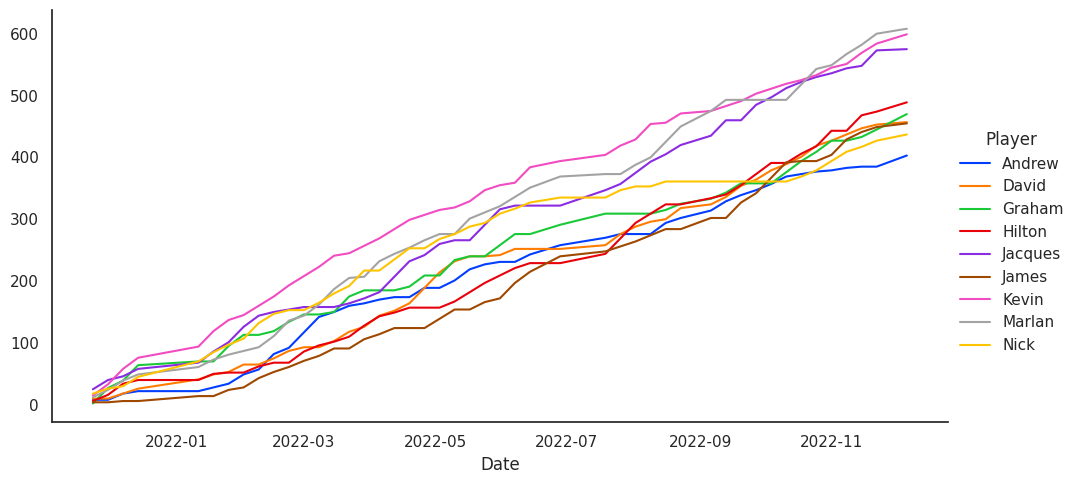

In [142]:
sns.relplot(no_ghost_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill(), kind="line", dashes=False, aspect=2)

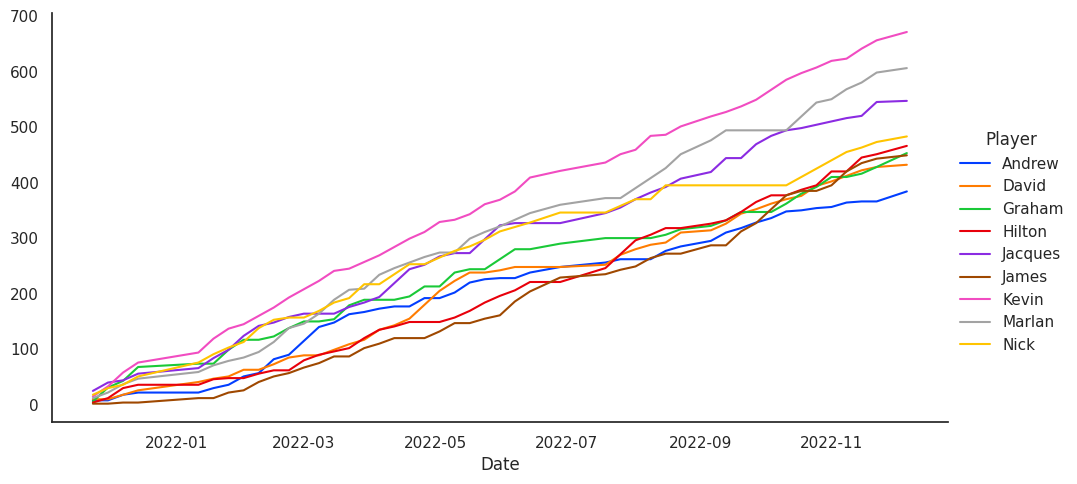

In [150]:
sns.relplot(final_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill(), kind="line", dashes=False, aspect=2)

In [131]:
no_ghost_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill().rank(axis=1, ascending=False, method="min")

Player,Andrew,David,Graham,Hilton,Jacques,James,Kevin,Marlan,Nick
Date,,,,,,,,,
2021-11-23,6.0,5.0,9.0,7.0,1.0,8.0,3.0,4.0,2.0
2021-11-30,8.0,7.0,3.0,6.0,1.0,9.0,2.0,5.0,4.0
2021-12-07,7.0,7.0,3.0,5.0,2.0,9.0,1.0,3.0,6.0
2021-12-14,8.0,7.0,2.0,6.0,3.0,9.0,1.0,4.0,5.0
2022-01-11,8.0,6.0,2.0,7.0,4.0,9.0,1.0,5.0,2.0
2022-01-18,8.0,7.0,5.0,6.0,2.0,9.0,1.0,4.0,3.0
2022-01-25,8.0,6.0,4.0,7.0,2.0,9.0,1.0,5.0,3.0
2022-02-01,8.0,6.0,3.0,7.0,2.0,9.0,1.0,5.0,4.0
2022-02-08,8.0,6.0,4.0,7.0,2.0,9.0,1.0,5.0,3.0


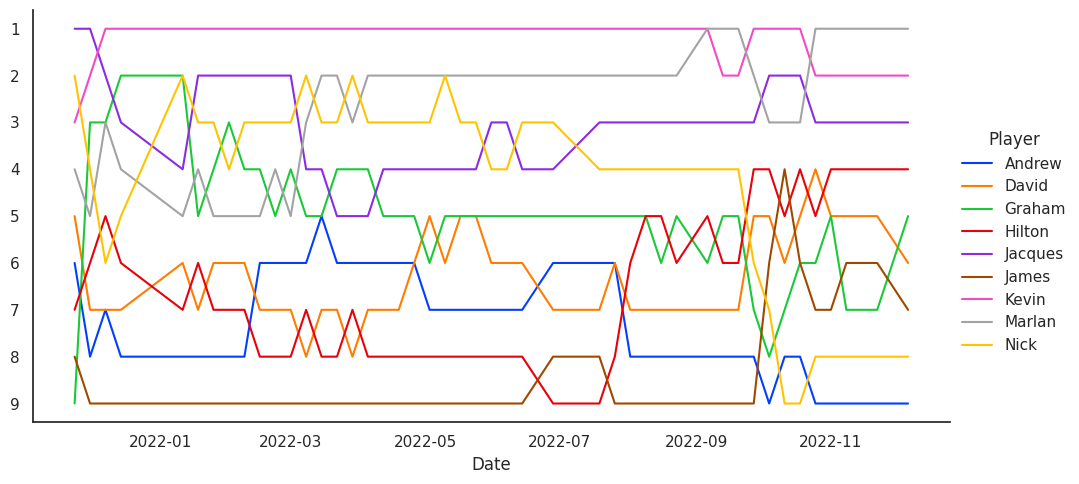

In [140]:
g = sns.relplot(no_ghost_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill().rank(axis=1, ascending=False, method="min"), kind="line", dashes=False, aspect=2)
for ax in g.axes[0]:
    ax.invert_yaxis()

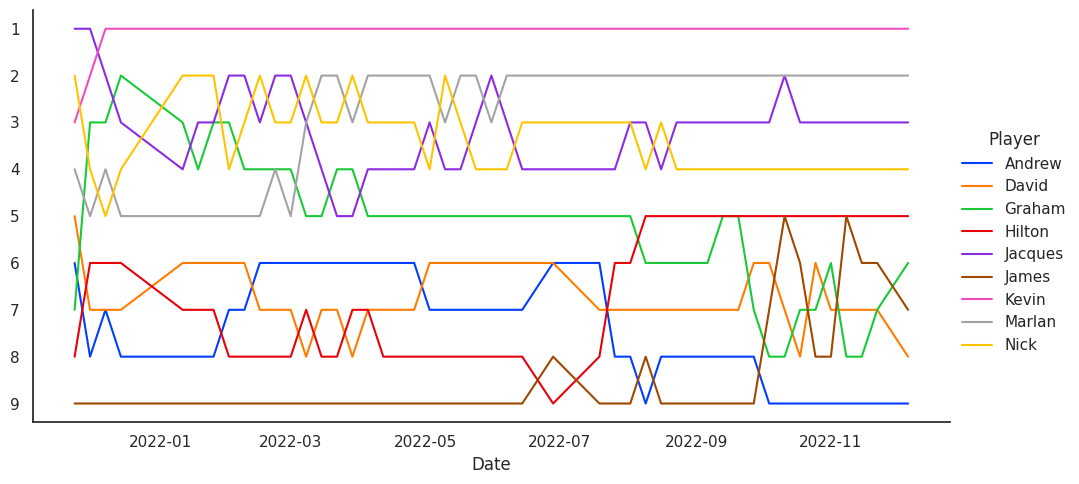

In [151]:
g = sns.relplot(final_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill().rank(axis=1, ascending=False, method="min"), kind="line", dashes=False, aspect=2)
for ax in g.axes[0]:
    ax.invert_yaxis()

In [155]:
(
    final_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill()
    - no_ghost_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill()
)

Player,Andrew,David,Graham,Hilton,Jacques,James,Kevin,Marlan,Nick
Date,,,,,,,,,
2021-11-23,0.0,0.0,4.0,-2.0,0.0,-2.0,0.0,0.0,0.0
2021-11-30,0.0,0.0,4.0,-4.0,0.0,-2.0,0.0,-2.0,4.0
2021-12-07,0.0,0.0,4.0,-4.0,-2.0,-2.0,0.0,-2.0,6.0
2021-12-14,0.0,0.0,4.0,-4.0,-2.0,-2.0,0.0,-2.0,6.0
2022-01-11,0.0,0.0,4.0,-4.0,-2.0,-2.0,0.0,-2.0,6.0
2022-01-18,2.0,-2.0,4.0,-4.0,-2.0,-2.0,0.0,-2.0,6.0
2022-01-25,2.0,-2.0,4.0,-4.0,-2.0,-2.0,0.0,-2.0,6.0
2022-02-01,2.0,-2.0,4.0,-4.0,-2.0,-2.0,0.0,-2.0,6.0
2022-02-08,0.0,-2.0,4.0,-6.0,-2.0,-2.0,0.0,2.0,6.0


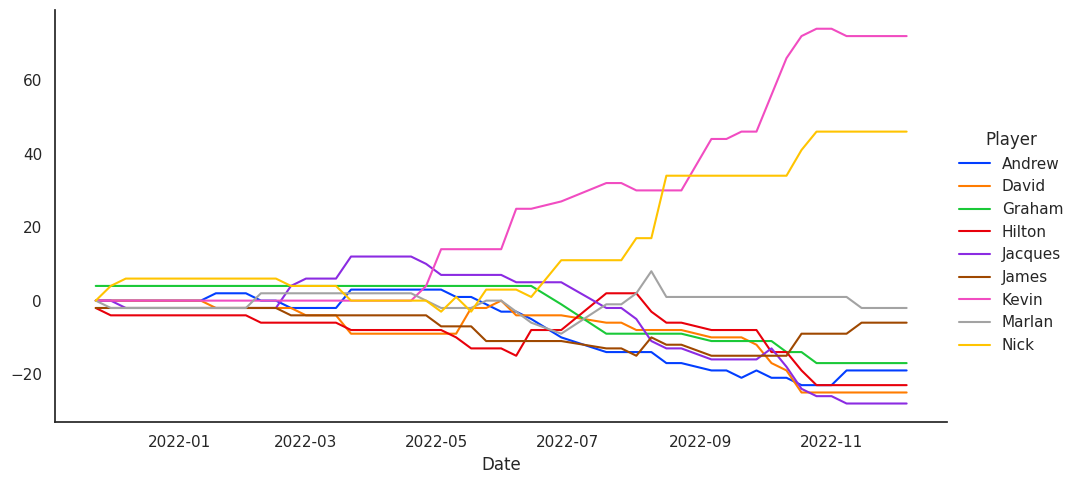

In [156]:
sns.relplot(
    final_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill()
    - no_ghost_results_df.drop(columns="Peter").replace({row["Position"]: row["F1score"] for _, row in scoring_df.iterrows()}).cumsum().ffill(),
    kind="line", dashes=False, aspect=2
)